# Lab 8: Implement Your Machine Learning Project Plan - Predicting Review Scores of NYC Airbnb Listings 

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

### More packages will be imported later as need be

In [2]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:

airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
df = pd.read_csv(airbnbDataSet_filename, header = 0)
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:

unstr_text_colnames = ['description', 'name', 'neighborhood_overview', 'host_about', 'host_name', 'host_location', 'room_type']
df.drop(unstr_text_colnames, axis = 1, inplace = True)
df.shape

(28022, 43)

### <i> One Hot Encoding </i> for the <i> Amenities and Neigborhood Group Cleansed </i>, dropping all other columns with object values 

In [5]:
# One-hot encoding 'neighborhood_group_cleansed'

# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse=False)

# Apply the OneHotEncoder to the 'neighbourhood_group_cleansed' column
encoded_cols = ohe.fit_transform(df[['neighbourhood_group_cleansed']])

# Create a DataFrame with the one-hot encoded data
encoded_df = pd.DataFrame(encoded_cols, columns=ohe.get_feature_names(['neighbourhood_group_cleansed']), index=df.index)

# Join the original DataFrame and the new one-hot encoded DataFrame
df_encoded = df.join(encoded_df)

# One-hot encoding 'amenities' 

# Parse the 'amenities' column to extract the individual amenities
df_encoded['amenities_parsed'] = df_encoded['amenities'].str.strip('{}').str.split(',')

# Apply one-hot encoding to the parsed amenities
mlb = MultiLabelBinarizer(sparse_output=True)
amenities_encoded = mlb.fit_transform(df_encoded['amenities_parsed'])

# Create a DataFrame with the one-hot encoded amenities
amenities_df = pd.DataFrame.sparse.from_spmatrix(amenities_encoded, columns=mlb.classes_, index=df_encoded.index)

# Determine the most common amenities
amenity_counts = amenities_df.sum().sort_values(ascending=False)

# Choose a threshold for the minimum number of listings that must offer an amenity for it to be included
threshold = len(df_encoded) * 0.25  # 25% of the listings

# Get the most common amenities
common_amenities = amenity_counts[amenity_counts >= threshold].index.tolist()

# Keep only the most common amenities in the DataFrame
df_encoded = df_encoded.join(amenities_df[common_amenities])
df_encoded.columns = df_encoded.columns.str.replace("[", "").str.replace("]", "").str.replace("'", "")

df_encoded.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,accommodates,bathrooms,...,"""Fire extinguisher""","""Stove""","""Oven""","""Bed linens""","""TV""","""First aid kit""","""Washer""","""Dryer""","""Essentials""","""Private entrance"""
0,0.80,0.17,True,8.0,8.0,True,True,Manhattan,1,1.0,...,1,1,1,1,1,0,0,0,0,0
1,0.09,0.69,True,1.0,1.0,True,True,Brooklyn,3,1.0,...,1,1,1,1,0,0,0,0,0,0
2,1.00,0.25,True,1.0,1.0,True,True,Brooklyn,4,1.5,...,0,0,0,0,0,0,1,1,0,0
3,1.00,1.00,True,1.0,1.0,True,True,Manhattan,2,1.0,...,0,0,0,1,1,0,0,0,1,0
4,NaN,NaN,True,1.0,1.0,True,True,Manhattan,1,1.0,...,1,0,0,0,0,0,0,0,0,0


### Drop columns with too many missing values or filled them with the mean for that specific feature

In [6]:
df_encoded.drop('amenities_parsed', axis = 1, inplace = True)
df_encoded.drop(['host_response_rate', 'host_acceptance_rate'], axis = 1, inplace = True)
mean_bedrooms = df_encoded['bedrooms'].mean()
mean_beds = df_encoded['beds'].mean()
df_encoded['bedrooms'] = df_encoded['bedrooms'].fillna(value = mean_bedrooms)
df_encoded['beds'] = df_encoded['beds'].fillna(value = mean_beds)

In [7]:
df_encoded.isnull().values.any()

False

In [8]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['neighbourhood_group_cleansed', 'amenities'], dtype='object')

### Looking at correlations between the features left and our future label

In [9]:
correlations = df_encoded.corr()['review_scores_rating'].sort_values(ascending=False)
correlations

review_scores_rating           1.000000
review_scores_value            0.820631
review_scores_cleanliness      0.758213
review_scores_communication    0.727749
review_scores_checkin          0.688152
                                 ...   
availability_60               -0.108681
availability_30               -0.130953
host_is_superhost                   NaN
host_has_profile_pic                NaN
host_identity_verified              NaN
Name: review_scores_rating, Length: 73, dtype: float64

In [10]:
# Dropping columns we one hot encoded and three features that have the same answer for every example
df_encoded.drop(['neighbourhood_group_cleansed', 'amenities'], axis = 1, inplace = True)
df_encoded.drop(['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified'], axis = 1, inplace = True)

# I will work with 3 different dataframes, this dataframe being one with feature names containing "review" that aren't our label feature
other_review_columns = ['review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
df_review_features = df[other_review_columns]

df_encoded.drop(other_review_columns, axis = 1, inplace = True)

df_review_features.head()

,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,4.62,4.76,4.79,4.86,4.41
1,4.49,4.78,4.80,4.71,4.64
2,5.00,5.00,5.00,4.50,5.00
3,3.73,4.66,4.42,4.87,4.36
4,4.82,4.97,4.95,4.94,4.92


In [11]:
# The second dataframe will just work with the top 10 features with most correlation, all happeing to be amenities
correlations = df_encoded.corr()['review_scores_rating'].sort_values(ascending = False)
correlations[:11]

review_scores_rating        1.000000
 "Dishes and silverware"    0.134612
 "Hot water"                0.121610
 "Hangers"                  0.117725
 "Hair dryer"               0.114325
 "Refrigerator"             0.110026
 "Free street parking"      0.109037
 "Oven"                     0.098178
 "Shampoo"                  0.094574
 "Cooking basics"           0.093813
 "Microwave"                0.091905
Name: review_scores_rating, dtype: float64

In [12]:
top_10_amenities = [' "Dishes and silverware"', ' "Hot water"', ' "Hangers"', ' "Hair dryer"', ' "Refrigerator"', ' "Free street parking"', ' "Oven"', ' "Shampoo"', ' "Cooking basics"', ' "Microwave"']
df_amenities = df_encoded[top_10_amenities]
df_amenities.head()

,"""Dishes and silverware""","""Hot water""","""Hangers""","""Hair dryer""","""Refrigerator""","""Free street parking""","""Oven""","""Shampoo""","""Cooking basics""","""Microwave"""
0,1,1,1,1,1,1,1,0,1,0
1,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,1,0,1,0,1
4,0,0,0,1,0,1,0,1,0,0


In [13]:
# Make future label, but X will be different for each of the two dataframes 
y = df_encoded['review_scores_rating']

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

### If the RSME is close to the standard deviation, the R2 score will not be good

In [14]:
df_encoded['review_scores_rating'].describe()

count    28022.000000
mean         4.683482
std          0.505857
min          0.000000
25%          4.600000
50%          4.830000
75%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64

### I will use <i> Linear Regression, Decision Tree, Random Forest, and Gradient Boosting Decision Tree </i> on the first dataset using only the other "review" feature column with no hyperparameter tuning

In [15]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Label and Features from Data Set 1
X = df_review_features
y = df_encoded['review_scores_rating']

# Split data into training and test sets (70-30 split)
dataset1_X_train, dataset1_X_test, dataset1_y_train, dataset1_y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training and Evaluation

# Initialize models
dataset1_lr = LinearRegression()
dataset1_dt = DecisionTreeRegressor()
dataset1_rf = RandomForestRegressor()
dataset1_gbdt = GradientBoostingRegressor()

# Dictionary to store RMSE for each model
dataset1_rmse_values = {}
dataset1_r2_values = {}

# Train and evaluate Linear Regression
dataset1_lr.fit(dataset1_X_train, dataset1_y_train)
dataset1_lr_pred = dataset1_lr.predict(dataset1_X_test)

dataset1_lr_rmse = mean_squared_error(dataset1_y_test, dataset1_lr_pred, squared = False)
dataset1_lr_r2 = r2_score(dataset1_y_test, dataset1_lr_pred)

dataset1_rmse_values['Linear Regression'] = dataset1_lr_rmse 
dataset1_r2_values['Linear Regression'] = dataset1_lr_r2

# Train and evaluate Decision Tree
dataset1_dt.fit(dataset1_X_train, dataset1_y_train)
dataset1_dt_pred = dataset1_dt.predict(dataset1_X_test)

dataset1_dt_rmse = mean_squared_error(dataset1_y_test, dataset1_dt_pred, squared = False)
dataset1_dt_r2 = r2_score(dataset1_y_test, dataset1_dt_pred)

dataset1_rmse_values['Decision Tree'] = dataset1_dt_rmse
dataset1_r2_values['Decision Tree'] = dataset1_dt_r2

# Train and evaluate Random Forest
dataset1_rf.fit(dataset1_X_train, dataset1_y_train)
dataset1_rf_pred = dataset1_rf.predict(dataset1_X_test)

dataset1_rf_rmse = mean_squared_error(dataset1_y_test, dataset1_rf_pred, squared = False)
dataset1_rf_r2 = r2_score(dataset1_y_test, dataset1_rf_pred)

dataset1_rmse_values['Random Forest'] = dataset1_rf_rmse
dataset1_r2_values['Random Forest'] = dataset1_rf_r2

# Train and evaluate Gradient Boosting 
dataset1_gbdt.fit(dataset1_X_train, dataset1_y_train)
dataset1_gbdt_pred = dataset1_gbdt.predict(dataset1_X_test)

dataset1_gbdt_rmse = mean_squared_error(dataset1_y_test, dataset1_gbdt_pred, squared = False)
dataset1_gbdt_r2 = r2_score(dataset1_y_test, dataset1_gbdt_pred)

dataset1_rmse_values['GBDT'] = dataset1_gbdt_rmse
dataset1_r2_values['GBDT'] = dataset1_gbdt_r2

print(dataset1_rmse_values)
print(dataset1_r2_values)

{'Linear Regression': 0.2590141597329023, 'Decision Tree': 0.2997281854145208, 'Random Forest': 0.25550309067943544, 'GBDT': 0.2309007076600159}
{'Linear Regression': 0.7350124691815855, 'Decision Tree': 0.6451591638576447, 'Random Forest': 0.7421478595224982, 'GBDT': 0.7894142630383557}


### I will now use Stacking using the base models above

In [16]:
from sklearn.ensemble import StackingRegressor

# Train and Evaluate Stacking 
dataset1_base_models = [
    ('Linear Regression', dataset1_lr),
    ('Decision Tree', dataset1_dt),
    ('Random Forest', dataset1_rf),
    ('Gradient Boosting', dataset1_gbdt)
]

dataset1_stacking = StackingRegressor(estimators = dataset1_base_models)

dataset1_stacking.fit(dataset1_X_train, dataset1_y_train)
dataset1_stacking_pred = dataset1_stacking.predict(dataset1_X_test)

dataset1_stacking_rmse = mean_squared_error(dataset1_y_test, dataset1_stacking_pred, squared = False)
dataset1_stacking_r2 = r2_score(dataset1_y_test, dataset1_stacking_pred)

dataset1_rmse_values['Stacking'] = dataset1_stacking_rmse
dataset1_r2_values['Stacking'] = dataset1_stacking_r2

print('Root Mean Squared Error: {0}'.format(dataset1_stacking_rmse))
print('R2: {0}'.format(dataset1_stacking_r2))  

Root Mean Squared Error: 0.24112177750961972
R2: 0.7703580118681402


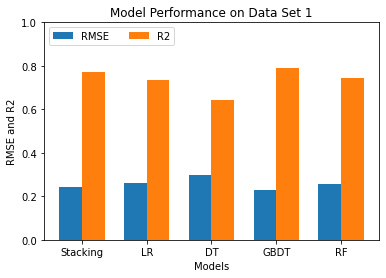

In [17]:
RMSE_Results = [dataset1_stacking_rmse, dataset1_lr_rmse, dataset1_dt_rmse, dataset1_gbdt_rmse, dataset1_rf_rmse]
R2_Results = [dataset1_stacking_r2, dataset1_lr_r2, dataset1_dt_r2, dataset1_gbdt_r2, dataset1_rf_r2]
labels = ['Stacking', 'LR', 'DT', 'GBDT', 'RF']

rg= np.arange(5)
width = 0.35

# 1. Create bar plot with RMSE results
plt.bar(rg, RMSE_Results, width, label="RMSE")

# Create bar plot with R2 results
plt.bar(rg+width, R2_Results, width, label='R2')

# Call plt.xticks() to add labels under the bars indicating which model the pair of RMSE 
# and R2 bars correspond to
plt.xticks(rg + width/2, labels)

# 4. Label the x and y axis of the plot 
plt.xlabel("Models")
plt.ylabel("RMSE and R2")

plt.ylim([0,1])
plt.title('Model Performance on Data Set 1')
plt.legend(loc='upper left', ncol=2)
plt.show()

### We will now do this same process with the other dataset with the top 10 features, or amenities airbnbs offer in this situation with no hyperparameter tuning

In [18]:
# Label and Features from Data Set 2
X = df_amenities
y = df_encoded['review_scores_rating']

# Split data into training and test sets (70-30 split)
dataset2_X_train, dataset2_X_test, dataset2_y_train, dataset2_y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training and Evaluation

# Initialize models
dataset2_lr = LinearRegression()
dataset2_dt = DecisionTreeRegressor()
dataset2_rf = RandomForestRegressor()
dataset2_gbdt = GradientBoostingRegressor()

# Dictionary to store RMSE for each model
dataset2_rmse_values = {}
dataset2_r2_values = {}

# Train and evaluate Linear Regression
dataset2_lr.fit(dataset2_X_train, dataset2_y_train)
dataset2_lr_pred = dataset2_lr.predict(dataset2_X_test)

dataset2_lr_rmse = mean_squared_error(dataset2_y_test, dataset2_lr_pred, squared = False)
dataset2_lr_r2 = r2_score(dataset2_y_test, dataset2_lr_pred)

dataset2_rmse_values['Linear Regression'] = dataset2_lr_rmse 
dataset2_r2_values['Linear Regression'] = dataset2_lr_r2

# Train and evaluate Decision Tree
dataset2_dt.fit(dataset2_X_train, dataset2_y_train)
dataset2_dt_pred = dataset2_dt.predict(dataset2_X_test)

dataset2_dt_rmse = mean_squared_error(dataset2_y_test, dataset2_dt_pred, squared = False)
dataset2_dt_r2 = r2_score(dataset2_y_test, dataset2_dt_pred)

dataset2_rmse_values['Decision Tree'] = dataset2_dt_rmse
dataset2_r2_values['Decision Tree'] = dataset2_dt_r2

# Train and evaluate Random Forest
dataset2_rf.fit(dataset2_X_train, dataset2_y_train)
dataset2_rf_pred = dataset2_rf.predict(dataset2_X_test)

dataset2_rf_rmse = mean_squared_error(dataset2_y_test, dataset2_rf_pred, squared = False)
dataset2_rf_r2 = r2_score(dataset2_y_test, dataset2_rf_pred)

dataset2_rmse_values['Random Forest'] = dataset2_rf_rmse
dataset2_r2_values['Random Forest'] = dataset2_rf_r2

# Train and evaluate Gradient Boosting 
dataset2_gbdt.fit(dataset2_X_train, dataset2_y_train)
dataset2_gbdt_pred = dataset2_gbdt.predict(dataset2_X_test)

dataset2_gbdt_rmse = mean_squared_error(dataset2_y_test, dataset2_gbdt_pred, squared = False)
dataset2_gbdt_r2 = r2_score(dataset2_y_test, dataset2_gbdt_pred)

dataset2_rmse_values['GBDT'] = dataset2_gbdt_rmse
dataset2_r2_values['GBDT'] = dataset2_gbdt_r2

print(dataset2_rmse_values)
print(dataset2_r2_values)


{'Linear Regression': 0.4953827072675459, 'Decision Tree': 0.5093439859389979, 'Random Forest': 0.5024563298816397, 'GBDT': 0.4948500674493203}
{'Linear Regression': 0.03069576650636885, 'Decision Tree': -0.024709565479441142, 'Random Forest': 0.002816534800780368, 'GBDT': 0.032779054692999354}


In [19]:
# Train and Evaluate Stacking 
dataset2_base_models = [
    ('Linear Regression', dataset2_lr),
    ('Decision Tree', dataset2_dt),
    ('Random Forest', dataset2_rf),
    ('Gradient Boosting', dataset2_gbdt)
]

dataset2_stacking = StackingRegressor(estimators = dataset2_base_models)

dataset2_stacking.fit(dataset2_X_train, dataset2_y_train)
dataset2_stacking_pred = dataset2_stacking.predict(dataset2_X_test)

dataset2_stacking_rmse = mean_squared_error(dataset2_y_test, dataset2_stacking_pred, squared = False)
dataset2_stacking_r2 = r2_score(dataset2_y_test, dataset2_stacking_pred)

dataset2_rmse_values['Stacking'] = dataset2_stacking_rmse
dataset2_r2_values['Stacking'] = dataset2_stacking_r2

print('Root Mean Squared Error: {0}'.format(dataset2_stacking_rmse))
print('R2: {0}'.format(dataset2_stacking_r2))  

Root Mean Squared Error: 0.4944863303591138
R2: 0.03420043403898232


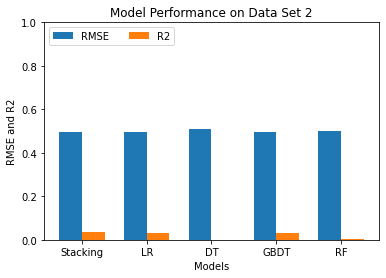

In [20]:
RMSE_Results = [dataset2_stacking_rmse, dataset2_lr_rmse, dataset2_dt_rmse, dataset2_gbdt_rmse, dataset2_rf_rmse]
R2_Results = [dataset2_stacking_r2, dataset2_lr_r2, dataset2_dt_r2, dataset2_gbdt_r2, dataset2_rf_r2]
labels = ['Stacking', 'LR', 'DT', 'GBDT', 'RF']

rg= np.arange(5)
width = 0.35

# 1. Create bar plot with RMSE results
# YOUR CODE HERE
plt.bar(rg, RMSE_Results, width, label="RMSE")

# 2. Create bar plot with R2 results
# YOUR CODE HERE
plt.bar(rg+width, R2_Results, width, label='R2')

# 3. Call plt.xticks() to add labels under the bars indicating which model the pair of RMSE 
# and R2 bars correspond to
# YOUR CODE HERE
plt.xticks(rg + width/2, labels)

# 4. Label the x and y axis of the plot: the x axis should be labeled "Models" and the y axis
# should be labeled "RMSE and R2"
# YOUR CODE HERE
plt.xlabel("Models")
plt.ylabel("RMSE and R2")

plt.ylim([0,1])
plt.title('Model Performance on Data Set 2')
plt.legend(loc='upper left', ncol=2)
plt.show()

### The <i>root mean squared error</i> for this dataset is near the standard deviation, and along with the fact that the top 10 features outside of features with 'review' in there name have much less correlation to the label explains why the r2 scores are so low. Let's now do this with the dataset that doesn't have the 'review' features, but keeps all the other features

In [21]:
# Label and all features from original dataframe after one hot encoding and dropping all "review" feature names
X = df_encoded.drop(columns = 'review_scores_rating', axis = 1)
y = df_encoded['review_scores_rating']

# Split data into training and test sets (70-30 split)
dataset3_X_train, dataset3_X_test, dataset3_y_train, dataset3_y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training and Evaluation

# Initialize models
dataset3_lr = LinearRegression()
dataset3_dt = DecisionTreeRegressor()
dataset3_rf = RandomForestRegressor()
dataset3_gbdt = GradientBoostingRegressor()

# Dictionary to store RMSE for each model
dataset3_rmse_values = {}
dataset3_r2_values = {}

# Train and evaluate Linear Regression
dataset3_lr.fit(dataset3_X_train, dataset3_y_train)
dataset3_lr_pred = dataset3_lr.predict(dataset3_X_test)

dataset3_lr_rmse = mean_squared_error(dataset3_y_test, dataset3_lr_pred, squared = False)
dataset3_lr_r2 = r2_score(dataset3_y_test, dataset3_lr_pred)

dataset3_rmse_values['Linear Regression'] = dataset3_lr_rmse 
dataset3_r2_values['Linear Regression'] = dataset3_lr_r2

# Train and evaluate Decision Tree
dataset3_dt.fit(dataset3_X_train, dataset3_y_train)
dataset3_dt_pred = dataset3_dt.predict(dataset3_X_test)

dataset3_dt_rmse = mean_squared_error(dataset3_y_test, dataset3_dt_pred, squared = False)
dataset3_dt_r2 = r2_score(dataset3_y_test, dataset3_dt_pred)

dataset3_rmse_values['Decision Tree'] = dataset3_dt_rmse
dataset3_r2_values['Decision Tree'] = dataset3_dt_r2

# Train and evaluate Random Forest
dataset3_rf.fit(dataset3_X_train, dataset3_y_train)
dataset3_rf_pred = dataset3_rf.predict(dataset3_X_test)

dataset3_rf_rmse = mean_squared_error(dataset3_y_test, dataset3_rf_pred, squared = False)
dataset3_rf_r2 = r2_score(dataset3_y_test, dataset3_rf_pred)

dataset3_rmse_values['Random Forest'] = dataset3_rf_rmse
dataset3_r2_values['Random Forest'] = dataset3_rf_r2

# Train and evaluate Gradient Boosting 
dataset3_gbdt.fit(dataset3_X_train, dataset3_y_train)
dataset3_gbdt_pred = dataset3_gbdt.predict(dataset3_X_test)

dataset3_gbdt_rmse = mean_squared_error(dataset3_y_test, dataset3_gbdt_pred, squared = False)
dataset3_gbdt_r2 = r2_score(dataset3_y_test, dataset3_gbdt_pred)

dataset3_rmse_values['GBDT'] = dataset3_gbdt_rmse
dataset3_r2_values['GBDT'] = dataset3_gbdt_r2

print(dataset3_rmse_values)
print(dataset3_r2_values)

{'Linear Regression': 0.4835348881784596, 'Decision Tree': 0.675859795860972, 'Random Forest': 0.4769567669233517, 'GBDT': 0.46871273920250306}
{'Linear Regression': 0.07650604942221317, 'Decision Tree': -0.804228965009433, 'Random Forest': 0.10146198728832723, 'GBDT': 0.132255359647922}


In [22]:
# Train and Evaluate Stacking 
dataset3_base_models = [
    ('Linear Regression', dataset3_lr),
    ('Decision Tree', dataset3_dt),
    ('Random Forest', dataset3_rf),
    ('Gradient Boosting', dataset3_gbdt)
]

dataset3_stacking = StackingRegressor(estimators = dataset3_base_models)

dataset3_stacking.fit(dataset3_X_train, dataset3_y_train)
dataset3_stacking_pred = dataset3_stacking.predict(dataset3_X_test)

dataset3_stacking_rmse = mean_squared_error(dataset3_y_test, dataset3_stacking_pred, squared = False)
dataset3_stacking_r2 = r2_score(dataset3_y_test, dataset3_stacking_pred)

dataset3_rmse_values['Stacking'] = dataset3_stacking_rmse
dataset3_r2_values['Stacking'] = dataset3_stacking_r2

print('Root Mean Squared Error: {0}'.format(dataset3_stacking_rmse))
print('R2: {0}'.format(dataset3_stacking_r2))

Root Mean Squared Error: 0.46606462651378977
R2: 0.1420327527263744


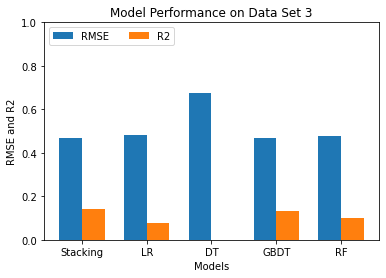

In [23]:
RMSE_Results = [dataset3_stacking_rmse, dataset3_lr_rmse, dataset3_dt_rmse, dataset3_gbdt_rmse, dataset3_rf_rmse]
R2_Results = [dataset3_stacking_r2, dataset3_lr_r2, dataset3_dt_r2, dataset3_gbdt_r2, dataset3_rf_r2]
labels = ['Stacking', 'LR', 'DT', 'GBDT', 'RF']

rg= np.arange(5)
width = 0.35

# 1. Create bar plot with RMSE results
# YOUR CODE HERE
plt.bar(rg, RMSE_Results, width, label="RMSE")

# 2. Create bar plot with R2 results
# YOUR CODE HERE
plt.bar(rg+width, R2_Results, width, label='R2')

# 3. Call plt.xticks() to add labels under the bars indicating which model the pair of RMSE 
# and R2 bars correspond to
# YOUR CODE HERE
plt.xticks(rg + width/2, labels)

# 4. Label the x and y axis of the plot: the x axis should be labeled "Models" and the y axis
# should be labeled "RMSE and R2"
# YOUR CODE HERE
plt.xlabel("Models")
plt.ylabel("RMSE and R2")

plt.ylim([0,1])
plt.title('Model Performance on Data Set 3')
plt.legend(loc='upper left', ncol=2)
plt.show()

# <center><u> Analysis </u></center>

- It's obvious that models using the features that also directly talk about review subsections of airbnb listings are better at predicting the main review score of an airbnb listing as opposed to any of the other features. It may prove useful to include more amenities by allowing a smaller percentage of appearances in airbnb postings before becoming a feature, however, I believe it will not make a big enough difference for these models and it will take much more computationial time as the amount of unique amenties in airbnb listings could be a 4 or 5 digit number, as opposed to working with at most 64 features now. This means that if feature leakage will be caused using the first data set, we will need much more examples and maybe more features to help predict the label.

- As I started trying to use <i>GridSearchCV and RandomizedSearchCV</i> to do hyperparameter tuning, it kept killing my kernel, so I wasn't able to tune my hyperparameters the way I wanted to. Running the code up to this point to get the results I have was already killing my kernel multiple times. Realistically speaking for the fiirst dataset, tuning the hyperparameters for the first dataset can easily lead to overfitting. <i>GBDT and Random Forests</i> only have one hyperparameter that is usually tuned, which is <u>n_estimators</u> (<u>GBDT relies on shallow trees and random forests rely on deep trees</u>), while <i>Logistic Regression's</i> <u>C</u> parameter can be tuned and <i>Decision Tree's</i> <u>max_depth, min_numbers_split and min_samples_leaf</u> can be tuned. If we do hyperparameter tuning on datasets 2 and 3, it will take an especially long time (especially dataset 3, as it has 64 features), and if the kernel didn't die each time and we were able to see the best hyperparameters, I'm sure it would not be a significant enough of a difference to put the R2 score at least in a moderate place of 0.5 or more, while many of the default hyperparamaters would probably suffice. 

- Below is my last attempt on this notebook for hyperparameter tuning using RandomizedSearchCV, as running RandomizedSearchCV for dataset 1's Random Forest crashed my kernel. I didn't want to lose the outputs above by trying to rerun everything again 

- <u>Final Comments</u>: It seems a model for predicting the label, which is the general review score of an airbnb listing in NYC, is not possible to find with this dataset unless we consider features that gives review scores for subcategories of an airbnb listing. After further thinking, besides all I've said above, I have not considered that many airbnb reviews are probably a 4 or above, where there may be outliers with 1,2, of 3 stars that shouldn't be considered. Along with the other ideas stated above, I don't think this would change anything for the 2 datasets that have features that aren't directly tied to giving a review score of a subcategory of an airbnb listing

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

dataset1_gbdt_param_distributions = {
    'n_estimators': randint(10,100)
}

dataset1_gbdt_random_search = RandomizedSearchCV(dataset1_gbdt, param_distributions = dataset1_gbdt_param_distributions, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)
dataset1_gbdt_random_search.fit(dataset1_X_train, dataset1_y_train)
dataset1_gbdt_best_model = dataset1_gbdt_random_search.best_estimator_

dataset1_gbdt_best_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=61,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
dataset1_rf_param_distributions = {
    'n_estimators': randint(50,1000)
}

dataset1_rf_random_search = RandomizedSearchCV(dataset1_rf, param_distributions = dataset1_rf_param_distributions, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)
dataset1_rf_random_search.fit(dataset1_X_train, dataset1_y_train)
dataset1_rf_best_model = dataset1_rf_random_search.best_estimator_

dataset1_rf_best_model